### 1. 문제정의
1. 이직을 하면서 받은 퇴직금으로 전망 좋은 주식 종목에 투자하기로 결심
2. 주로 방문하는 주식시세 확인 웹 사이트에서 종목을 선택하고 분석하여 결과를 보관하고 싶음

### 2. 배경 지식-1
1. 웹 크로링(Web Crawling)
 - 인터넷 웹 사이트에 돌아다니며, 방문한 페이지의 내용과 링크의 복사본을 생성하여 다운로드 후 요약본을 만듬
 - 네이버, 구글처럼 검색창에 키워드를 입력하면 URL을 지닌 페이지와 외부 사이트 링크도 요약본과 함께 노출
 - 검색엔진이 웹 크롤러가 수집한 데이터에 검색 알고리즘을 적용하여 정보를 추출한 결과임
 
2. 웹 스크래핑(Web Scraping)
 - 특정 웹 사이트나 페이지에서 필요한 데이터를 자동으로 추출해내는 것
 - '스크래퍼 봇'이 특정 웹사이트에 콘텐트를 다운로드하기 위해 HTTP GET 요청을 보내고, HTML 문서를 분석하여 특정 패턴의 데이터 추출
 - 추출한 데이터는 원하느대로 사용할 수 잇도록 데이터베이스에 저장

### 3. 배경 지식-2 - HTML
1. hello.html 작성 및 실행

```html
       <html>
         <head>
             <title> HELLO </title>
           </head>
         <body>
             <h1> hello </h1>
             <p> 안녕하세요 </p>
         </body>
       </html>
```
 - 메모장에 'hello.html'을 작성하고, 웹브라우저로 열어보자

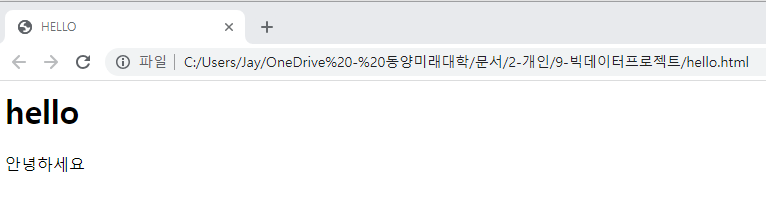

2. html 분석하기
 - 태그(tag) : 꺽쇠(<>)로 감싼 형태이며, 종료 태그는 슬래시(/)가 들어감
  ```html
      <html> ... </html>
  ```
 - \<head> 태그 :  웹 브라우저에 표시되지 않고, 페이지에 대한 metadata를 포함
   ```html
       <html>
         <head>
             <meta charset="utf-8">
             <title> HELLO </title>     - 브라우저에 표시할 제목
           </head>
         ....
       </html>
   ```
  - \<body> 태그 : 실제 웹 브라우저에 표시되는 내용
   ```html
       <html>
         ....
         <body>
             <h1> hello </h1>      -- 큰 글자 표시
             <p> 안녕하세요 </p>   -- 일반 단락을 표시
         </body>
         ....
       </html>
   ```
   
3. 크롬 웹 브라우저 개발자 도구 (검사-inspect)
 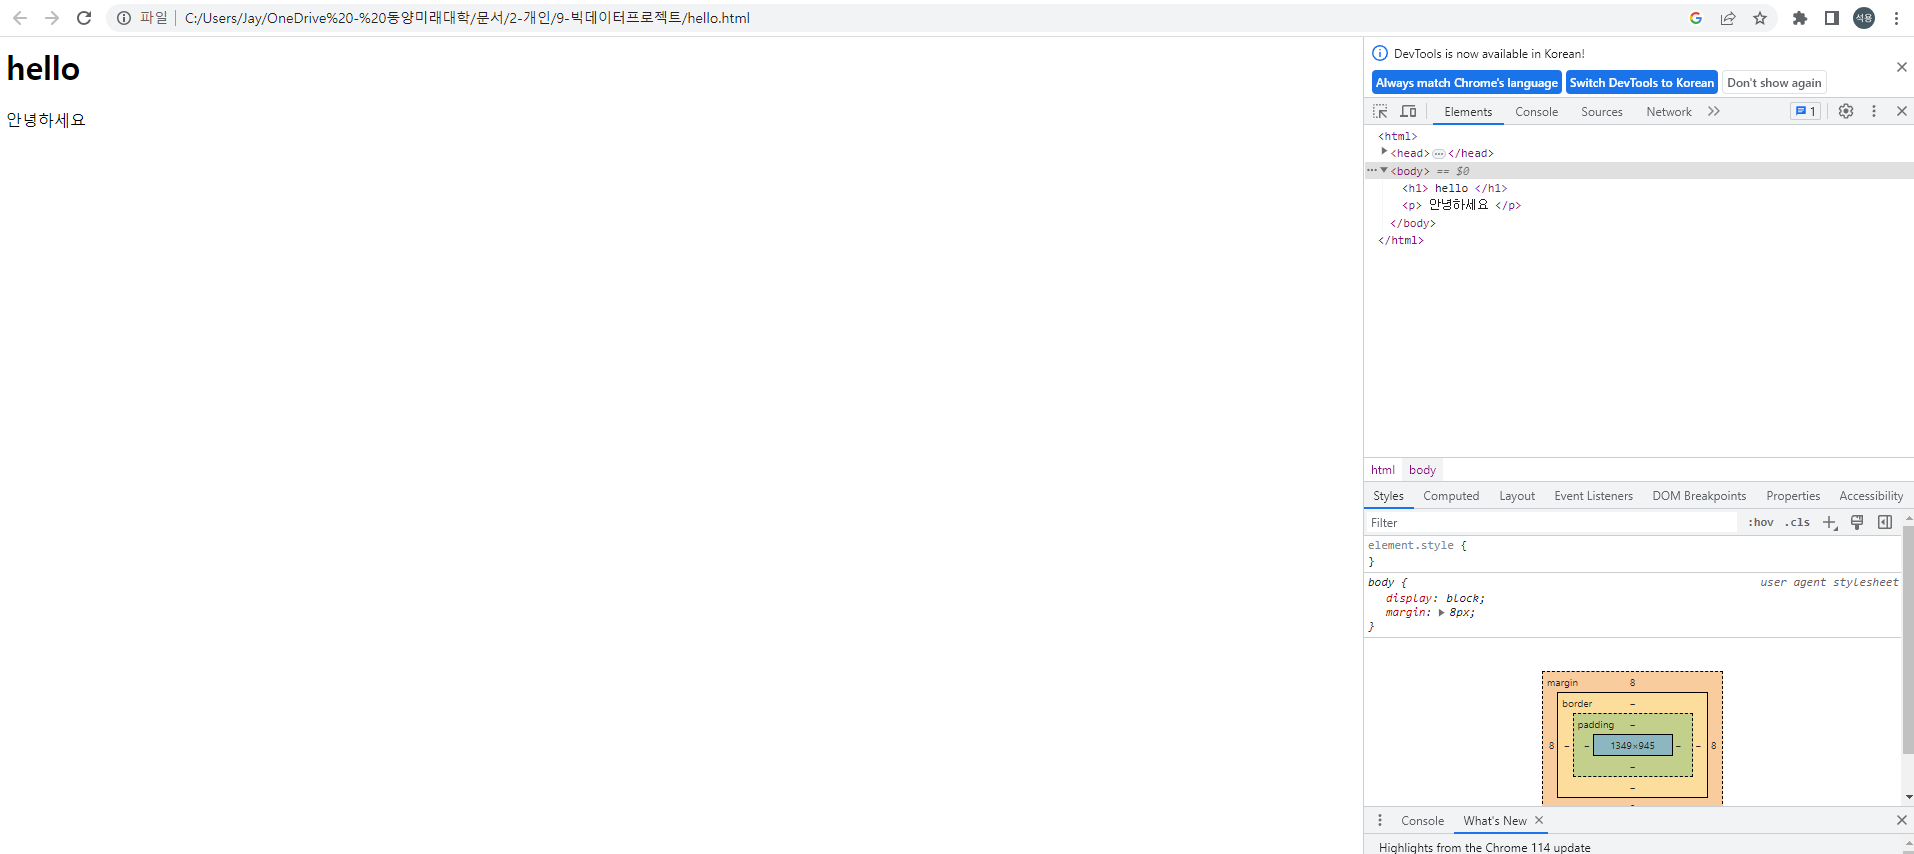

### 4. 웹 스크래핑
#### 4.1 주식 종목 선택하기
1. 네이버 금융 (https://finance.naver.com/) 데이터를 가져와 활용
2. 삼성전자 주식 정보 검색 - 일별 시세 찾기 (https://finance.naver.com/item/main.naver?code=005930)
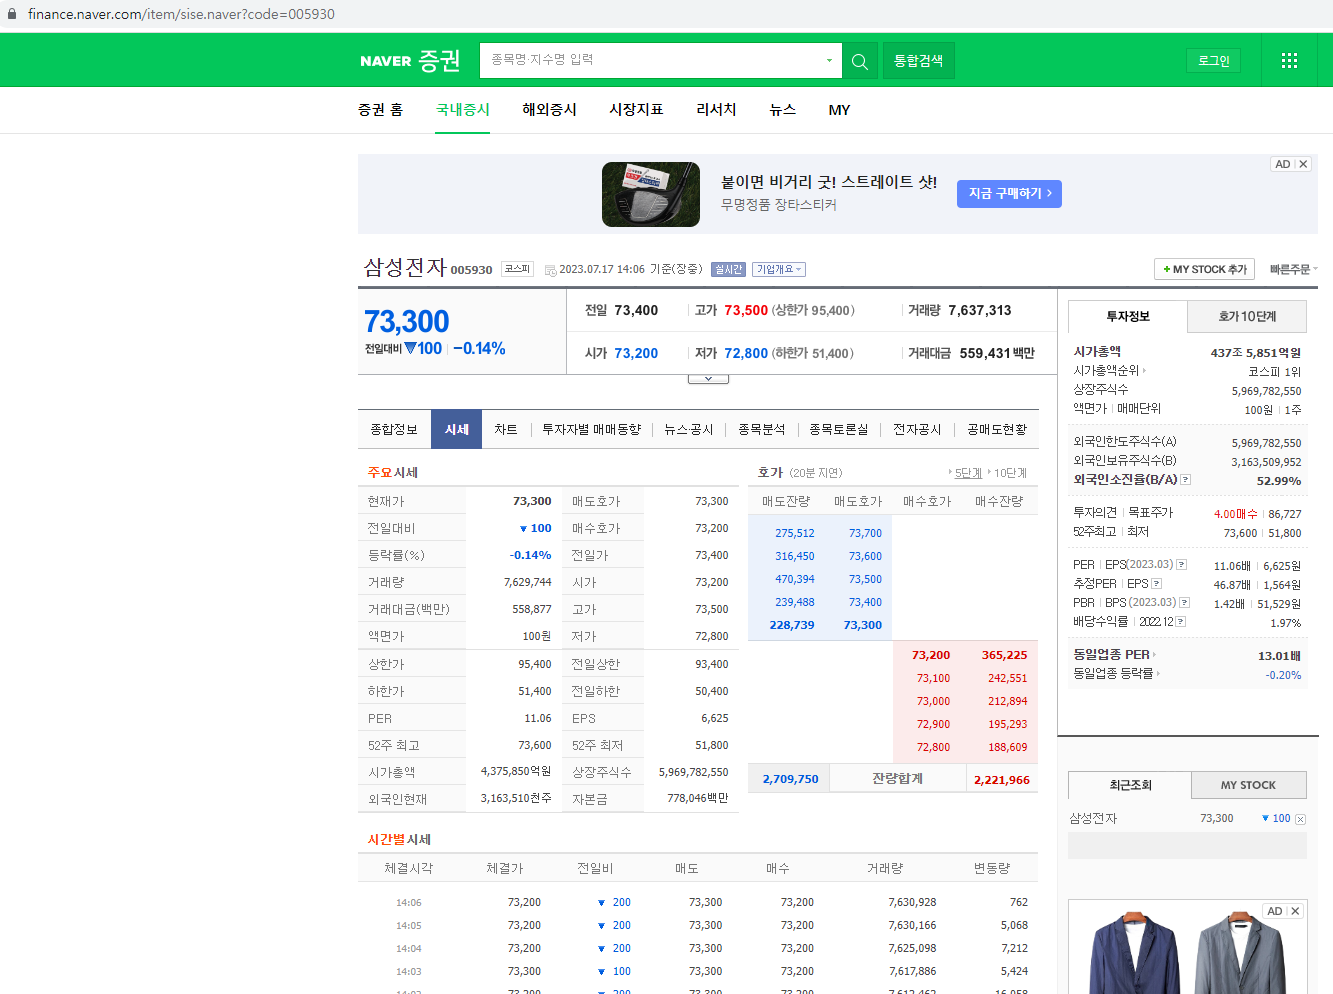


#### 4.2 주식 종목 선택하기
1. 삼성전자 주식 정보 검색 -일일 시세만 별도로 업데이트하는 URL 주소 찾기
2. 웹 브라우저 개발자 도구에서 [검사] - [Network] 탭으로 확인
 - 시세 2번 페이지 클릭시, "sise_day.naver?code=005930&page=2" 확인
 
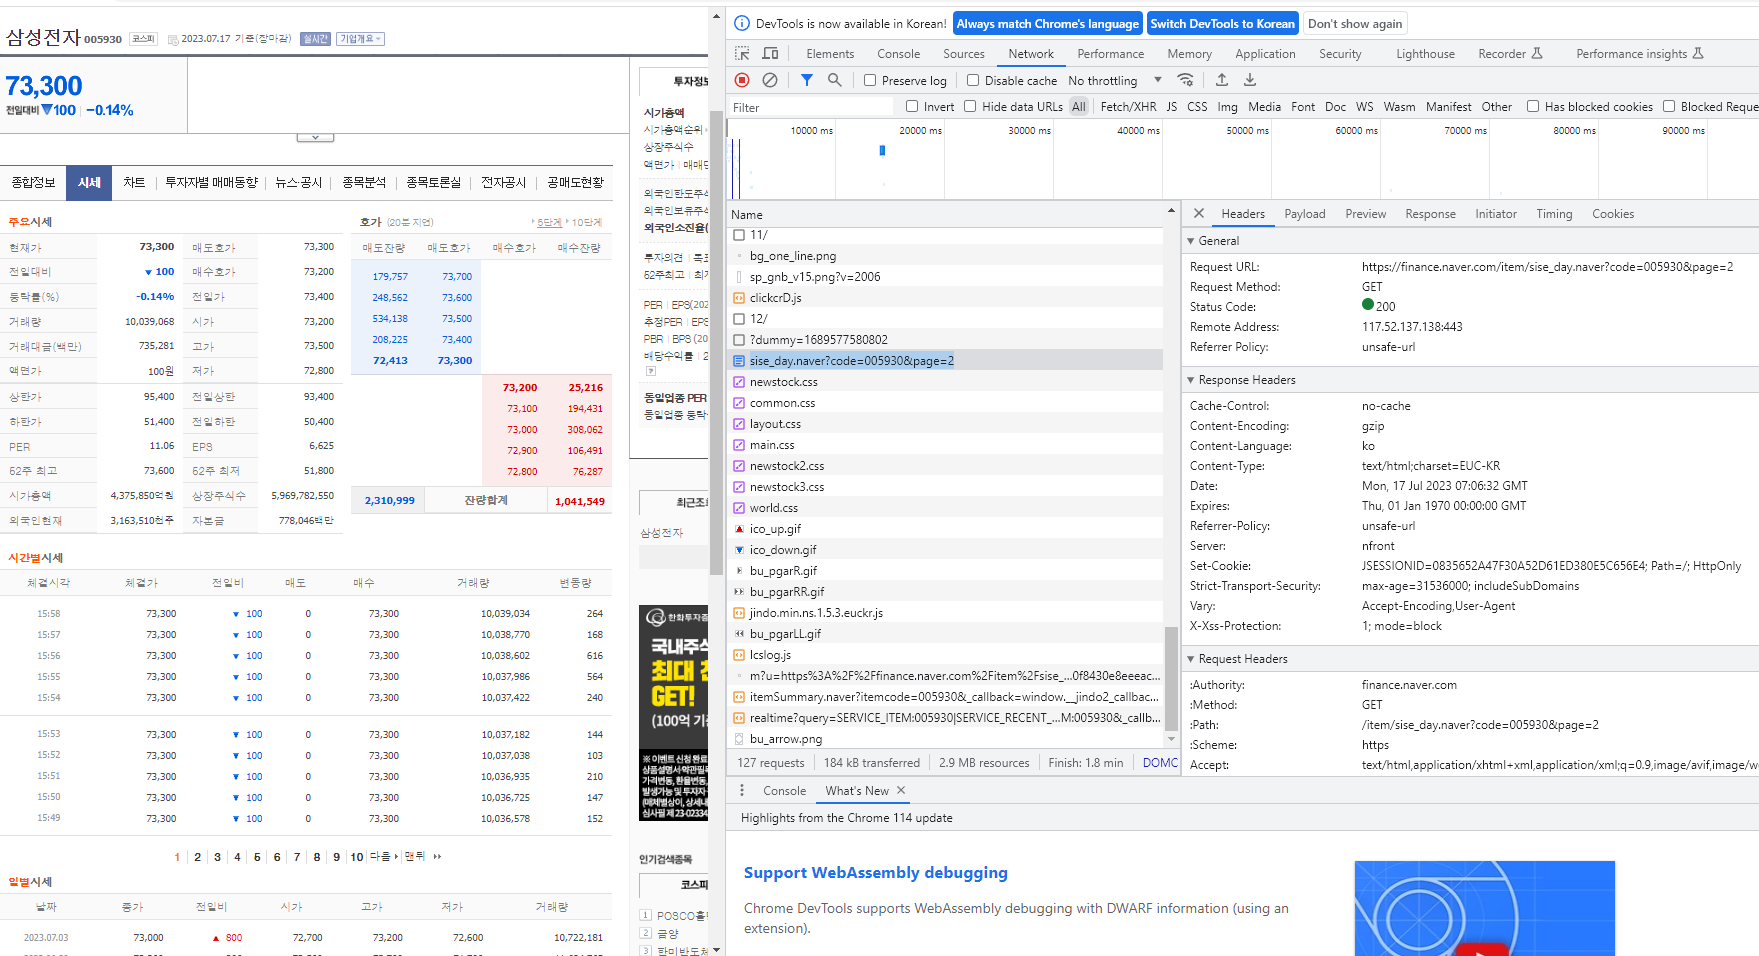

#### 4.3 웹 사이트 동작 방식 -  웹 브라우저에서 페이지 번호 클릭(가령 2페이지)
1. HTTP Request
 - 네이버로 요청 (https://finance.naver.com/item/sise_day.naver?code=005930&page=2)
 - [Headers] 탭 - HTTP 요청 Header (Request URL, path, user-agent 등) 확인하기
 - [Payload] 탭 - HTTP Payload (HTTP 요청을 보낼 때 함께 전송하는 데이터) : 주식코드, 페이지 번호등을 보내고 있음
 
2. HTTP Response
 - [Response] 탭 - 서버가 전송한 HTML 페이지 확인

#### 4.4 웹 스크래핑하기

In [1]:
# 웹 스크래핑을 위한 패키지 로드하기
import requests

# 웹 스크래핑 대상 주소 저장하기
url = 'https://finance.naver.com/item/sise_day.naver?code=005930&page=2'

# HTTP 요청을 대상 주소로 보내고, HTTP 응답을 받아 저장하기
page = requests.get(url)

# 응답 내용 확인하기
page.text

'\n<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">\n<html>\n<head>\n<meta http-equiv="Content-Type" content="text/html; charset=euc-kr">\n<title>네이버 :: 세상의 모든 지식, 네이버</title>\n\n<style type="text/css">\n.error_content * {margin:0;padding:0;}\n.error_content img{border:none;}\n.error_content em {font-style:normal;}\n.error_content {width:410px; margin:80px auto 0; padding:57px 0 0 0; font-size:12px; font-family:"나눔고딕", "NanumGothic", "돋움", Dotum, AppleGothic, Sans-serif; text-align:left; line-height:14px; background:url(https://ssl.pstatic.net/static/common/error/090610/bg_thumb.gif) no-repeat center top; white-space:nowrap;}\n.error_content p{margin:0;}\n.error_content .error_desc {margin-bottom:21px; overflow:hidden; text-align:center;}\n.error_content .error_desc2 {margin-bottom:11px; padding-bottom:7px; color:#888; line-height:18px; border-bottom:1px solid #eee;}\n.error_content .error_desc3 {clear:both; color:#888;}\n.error_con

- '페이지를 찾을 수 없습니다'
- 웹 브라우저가 아닌 방식으로 HTTP 요청시 응답을 전송하지 못하도록 막아놓았음

- 요청 헤더에 값을 설정하여 웹 브라우저 방식으로 요청
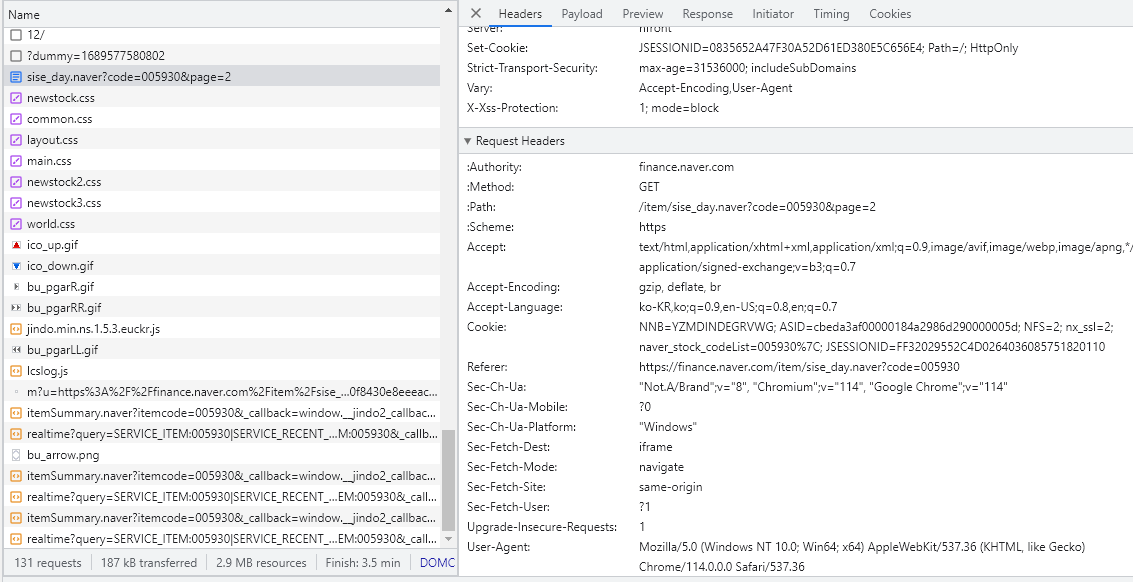

In [2]:
# 요청 헤더 정보 설정
my_headers = {'user-agent':'Mozilla/5.0'}

# 웹 스크래핑 대상 주소 저장하기 (일일 시세)
url = 'https://finance.naver.com/item/sise_day.naver?code=005930&page=2'

# HTTP 요청을 대상 주소로 보내고, HTTP 응답을 받아 저장하기
page = requests.get(url, headers=my_headers)

# 응답 내용 확인하기
page.text

'\n<html lang="ko">\n<head>\n<meta http-equiv="Content-Type" content="text/html; charset=euc-kr">\n<title>네이버 증권</title>\n\n<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20230713201205/css/newstock.css">\n<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20230713201205/css/common.css">\n<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20230713201205/css/layout.css">\n<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20230713201205/css/main.css">\n<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20230713201205/css/newstock2.css">\n<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20230713201205/css/newstock3.css">\n<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20230713201205/css/world.css">\n</head>\n<body>\n<script

- '2023.07.03'자 삼성전자 주식 시세 확인
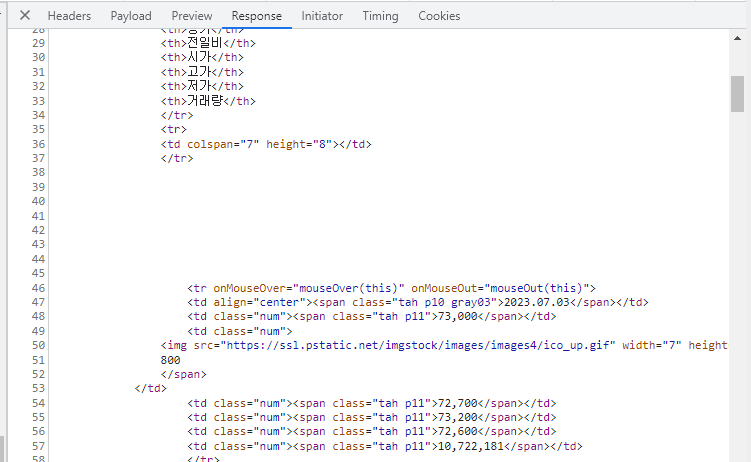

### 4.4.1 삼성전자 일별 주가 데이터 수집하기
- 별도의 브라우저 창으로 일별 주가 데이터 확인하기 
- ( https://finance.naver.com/item/sise_day.naver?code=005930&page=2 )

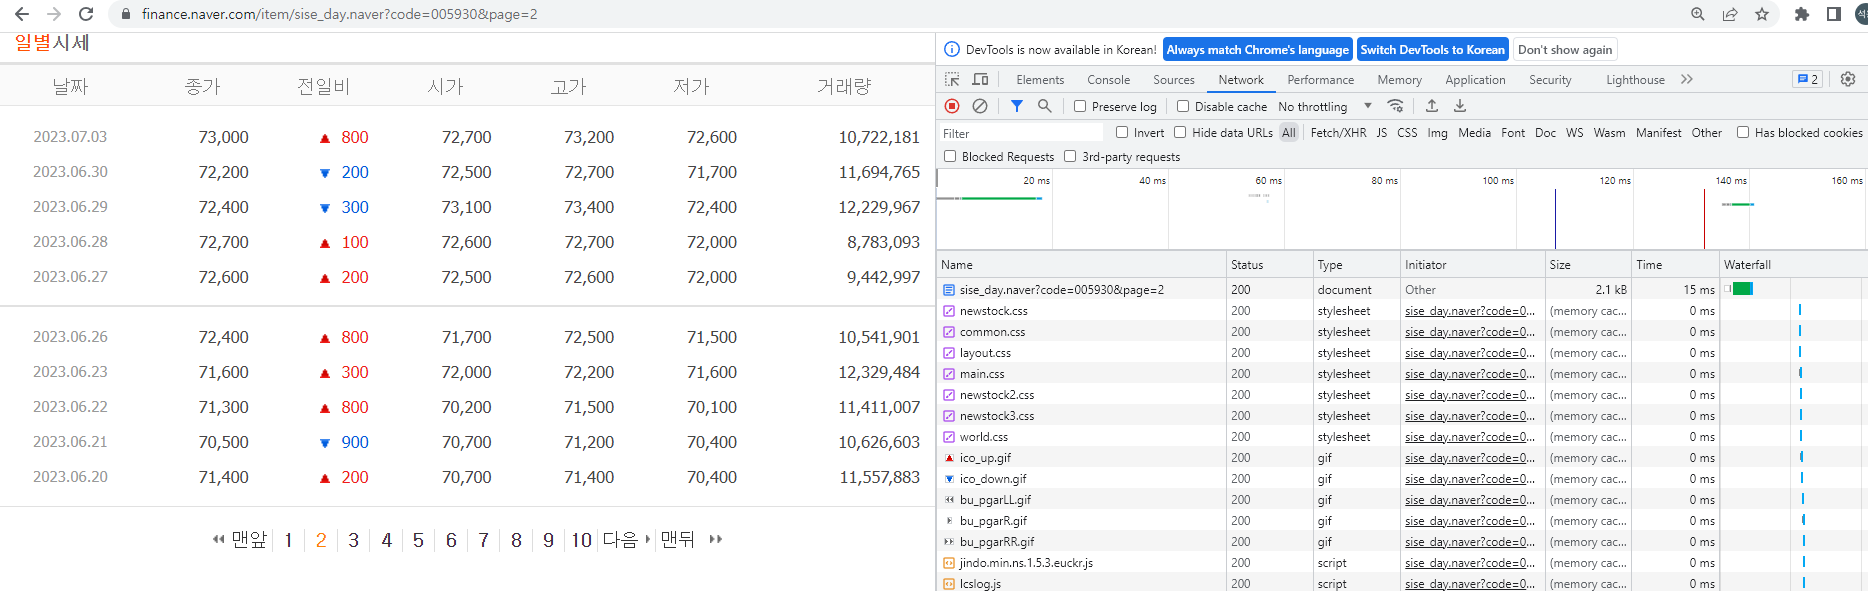

- html 테이블 데이터 가져오기
- [Elements] 탭에서 <table> 태그를 이용하여 테이블 데이터 가져오기
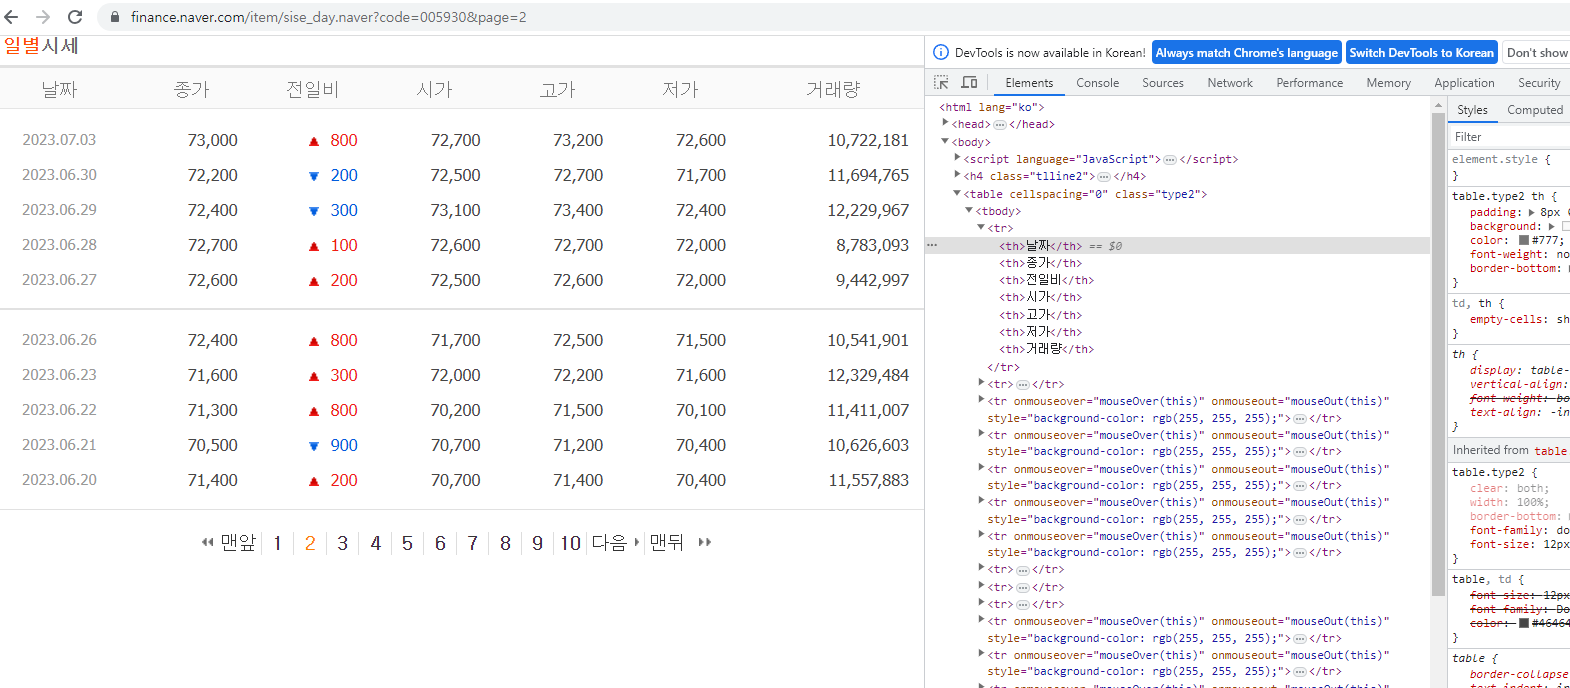


In [3]:
# 판다스 패키지 로드
import pandas as pd

# HTML 페이지에서 테이블 추출
pages = pd.read_html(page.text)

# 추출한 데이터 타입 확인하기
type(pages)

list

In [4]:
# 2테이블 데이터로 구성
len(pages)

2

In [5]:
# 2번 페이지의 삼성전자 일일 주가 테이블
pages[0]

,날짜,종가,전일비,시가,고가,저가,거래량
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2023.07.04,73000.0,0.0,73400.0,73600.0,72900.0,10214350.0
2,2023.07.03,73000.0,800.0,72700.0,73200.0,72600.0,10722181.0
3,2023.06.30,72200.0,200.0,72500.0,72700.0,71700.0,11694765.0
4,2023.06.29,72400.0,300.0,73100.0,73400.0,72400.0,12229967.0
5,2023.06.28,72700.0,100.0,72600.0,72700.0,72000.0,8783093.0
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2023.06.27,72600.0,200.0,72500.0,72600.0,72000.0,9442997.0


In [6]:
# 페이지 하단의 다른 페이지 네비게이션 리스트 테이블 페이지
pages[1]

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,맨앞,1,2,3,4,5,6,7,8,9,10,다음,맨뒤


### 4.4.2 페이지 처리된 삼성전자 일별 주가 데이터 수집하기

In [7]:
# 웹 스크래핑을 위한 패키지 로드하기
import requests

# 웹 스크래핑 대상 주소 저장하기
# 페이지 번호 생략
new_url = 'https://finance.naver.com/item/sise_day.naver?code=005930&page='

# 데이터(상성전자 일일 주가 페이지)를 축적할 데이터프레임 생성
all_tables = pd.DataFrame()

In [8]:
# 1페이지만 읽어오기
for page_number in range(1, 2):
    # 페이지 번호 추가한 주소 완성
    full_url = new_url + str(page_number)
    
    #주소 확인하기
    print(f'{page_number}번째 페이지 읽어오기({full_url})' )
    
    # HTTP 요청 전송 후 응답 받아오기
    page = requests.get(full_url, headers=my_headers)
          
    # 테이블 추출
    table = pd.read_html(page.text)[0]
          
    # 수행할 내용
    print(f'전체 {len(all_tables.index)} 줄에 {len(table.index)} 줄 추가')
          
    # 데이터 축적용 데이터프레임에 테이블 추가
    all_tables = pd.concat([all_tables, table])

1번째 페이지 읽어오기(https://finance.naver.com/item/sise_day.naver?code=005930&page=1)
전체 0 줄에 15 줄 추가


In [9]:
all_tables

,날짜,종가,전일비,시가,고가,저가,거래량
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2023.07.18,73000.0,300.0,73200.0,73500.0,72700.0,2654567.0
2,2023.07.17,73300.0,100.0,73200.0,73500.0,72800.0,10060049.0
3,2023.07.14,73400.0,1500.0,72500.0,73400.0,72400.0,15882519.0
4,2023.07.13,71900.0,0.0,72400.0,72600.0,71900.0,14417279.0
5,2023.07.12,71900.0,400.0,71200.0,72000.0,71100.0,10375581.0
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2023.07.11,71500.0,2000.0,70200.0,71500.0,70100.0,12177392.0


In [10]:
# 결측치 제거
all_tables.dropna(inplace=True)

all_tables

,날짜,종가,전일비,시가,고가,저가,거래량
1,2023.07.18,73000.0,300.0,73200.0,73500.0,72700.0,2654567.0
2,2023.07.17,73300.0,100.0,73200.0,73500.0,72800.0,10060049.0
3,2023.07.14,73400.0,1500.0,72500.0,73400.0,72400.0,15882519.0
4,2023.07.13,71900.0,0.0,72400.0,72600.0,71900.0,14417279.0
5,2023.07.12,71900.0,400.0,71200.0,72000.0,71100.0,10375581.0
9,2023.07.11,71500.0,2000.0,70200.0,71500.0,70100.0,12177392.0
10,2023.07.10,69500.0,400.0,70000.0,70400.0,69200.0,11713926.0
11,2023.07.07,69900.0,1700.0,71100.0,71400.0,69800.0,17308877.0
12,2023.07.06,71600.0,400.0,71900.0,72400.0,71500.0,14777667.0
13,2023.07.05,72000.0,1000.0,73000.0,73300.0,71900.0,12310610.0


In [11]:
# 10 페이지 읽어오기 (100일치 주식 데이터 일어오기)
for page_number in range(1, 11):
    # 페이지 번호 추가한 주소 완성
    full_url = new_url + str(page_number)
    
    #주소 확인하기
    print(f'{page_number}번째 페이지 읽어오기({full_url})' )
    
    # HTTP 요청 전송 후 응답 받아오기
    page = requests.get(full_url, headers=my_headers)
          
    # 테이블 추출
    table = pd.read_html(page.text)[0]
          
    # 수행할 내용
    print(f'전체 {len(all_tables.index)} 줄에 {len(table.index)} 줄 추가')
          
    # 데이터 축적용 데이터프레임에 테이블 추가
    all_tables = pd.concat([all_tables, table])

1번째 페이지 읽어오기(https://finance.naver.com/item/sise_day.naver?code=005930&page=1)
전체 10 줄에 15 줄 추가
2번째 페이지 읽어오기(https://finance.naver.com/item/sise_day.naver?code=005930&page=2)
전체 25 줄에 15 줄 추가
3번째 페이지 읽어오기(https://finance.naver.com/item/sise_day.naver?code=005930&page=3)
전체 40 줄에 15 줄 추가
4번째 페이지 읽어오기(https://finance.naver.com/item/sise_day.naver?code=005930&page=4)
전체 55 줄에 15 줄 추가
5번째 페이지 읽어오기(https://finance.naver.com/item/sise_day.naver?code=005930&page=5)
전체 70 줄에 15 줄 추가
6번째 페이지 읽어오기(https://finance.naver.com/item/sise_day.naver?code=005930&page=6)
전체 85 줄에 15 줄 추가
7번째 페이지 읽어오기(https://finance.naver.com/item/sise_day.naver?code=005930&page=7)
전체 100 줄에 15 줄 추가
8번째 페이지 읽어오기(https://finance.naver.com/item/sise_day.naver?code=005930&page=8)
전체 115 줄에 15 줄 추가
9번째 페이지 읽어오기(https://finance.naver.com/item/sise_day.naver?code=005930&page=9)
전체 130 줄에 15 줄 추가
10번째 페이지 읽어오기(https://finance.naver.com/item/sise_day.naver?code=005930&page=10)
전체 145 줄에 15 줄 추가


In [12]:
# 결측치 제거
all_tables.dropna(inplace=True)

all_tables

,날짜,종가,전일비,시가,고가,저가,거래량
1,2023.07.18,73000.0,300.0,73200.0,73500.0,72700.0,2654567.0
2,2023.07.17,73300.0,100.0,73200.0,73500.0,72800.0,10060049.0
3,2023.07.14,73400.0,1500.0,72500.0,73400.0,72400.0,15882519.0
4,2023.07.13,71900.0,0.0,72400.0,72600.0,71900.0,14417279.0
5,2023.07.12,71900.0,400.0,71200.0,72000.0,71100.0,10375581.0
...,...,...,...,...,...,...,...
9,2023.02.28,60600.0,100.0,60800.0,61400.0,60500.0,13715861.0
10,2023.02.27,60500.0,800.0,60800.0,60800.0,60200.0,11155697.0
11,2023.02.24,61300.0,700.0,62300.0,62600.0,61300.0,10308143.0
12,2023.02.23,62000.0,900.0,61700.0,62500.0,61500.0,13047099.0


## 5. 데이터 시각화


#### 5.1 상자 수염 그래프
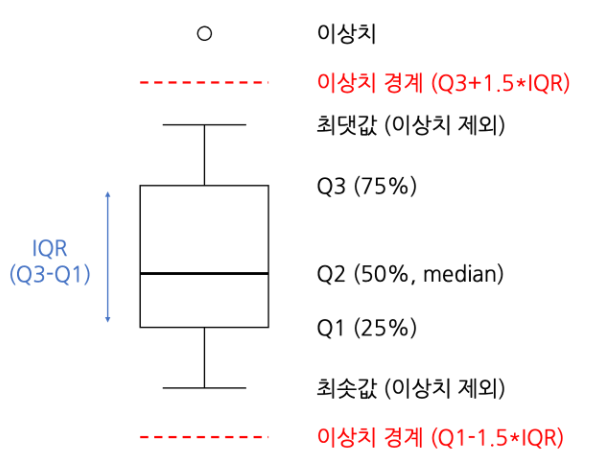

#### 5.2 시각화 대상 그래프 추출하기
1. 한글 변수 이름 영문으로 변경하기
- 한글을 그래프로 표현하면 폰트에 따라 그래프 라벨이 깨져보이는 경우가 있음
|한글 변수 이름 | 영문 변수 이름 |
|:---:|:---|
|날짜 | date |
|종가 | end_price |
|시가 | start_price |
|고가 | highest_price |
|저가 | lowest_price |

In [13]:
# 변수 이름을 영문으로 변경
all_tables.rename(columns= {'날짜' : 'date',
                            '종가' : 'end_price',
                            '시가' : 'start_price',
                            '고가' : 'highest_price',
                            '저가' : 'lowest_price'}, inplace=True)

# 데이터 확인하기
all_tables

,date,end_price,전일비,start_price,highest_price,lowest_price,거래량
1,2023.07.18,73000.0,300.0,73200.0,73500.0,72700.0,2654567.0
2,2023.07.17,73300.0,100.0,73200.0,73500.0,72800.0,10060049.0
3,2023.07.14,73400.0,1500.0,72500.0,73400.0,72400.0,15882519.0
4,2023.07.13,71900.0,0.0,72400.0,72600.0,71900.0,14417279.0
5,2023.07.12,71900.0,400.0,71200.0,72000.0,71100.0,10375581.0
...,...,...,...,...,...,...,...
9,2023.02.28,60600.0,100.0,60800.0,61400.0,60500.0,13715861.0
10,2023.02.27,60500.0,800.0,60800.0,60800.0,60200.0,11155697.0
11,2023.02.24,61300.0,700.0,62300.0,62600.0,61300.0,10308143.0
12,2023.02.23,62000.0,900.0,61700.0,62500.0,61500.0,13047099.0


2. 필요없는 변수 제거하기

In [15]:
# 필요없는 변수 제거하기
# axis : {0: index, 1: column(변수)}
# inplace : 원본을 변경할지 여부, True인 경우 원본이 변경됨
all_tables.drop(['전일비', '거래량'], axis=1, inplace=True)

# 데이터 확인하기
all_tables

,date,end_price,start_price,highest_price,lowest_price
1,2023.07.18,73000.0,73200.0,73500.0,72700.0
2,2023.07.17,73300.0,73200.0,73500.0,72800.0
3,2023.07.14,73400.0,72500.0,73400.0,72400.0
4,2023.07.13,71900.0,72400.0,72600.0,71900.0
5,2023.07.12,71900.0,71200.0,72000.0,71100.0
...,...,...,...,...,...
9,2023.02.28,60600.0,60800.0,61400.0,60500.0
10,2023.02.27,60500.0,60800.0,60800.0,60200.0
11,2023.02.24,61300.0,62300.0,62600.0,61300.0
12,2023.02.23,62000.0,61700.0,62500.0,61500.0


3. 일별 주가 중앙값(최고가와 최저값의 중앙값)을 구하고, 이를 이용하여 상자수염그래프 그리기

In [16]:
# 일별 주가 중앙값 변수 추가
all_tables['median_price'] = (all_tables['highest_price']+ all_tables['lowest_price']) / 2

# 데이터 확인하기
all_tables

,date,end_price,start_price,highest_price,lowest_price,median_price
1,2023.07.18,73000.0,73200.0,73500.0,72700.0,73100.0
2,2023.07.17,73300.0,73200.0,73500.0,72800.0,73150.0
3,2023.07.14,73400.0,72500.0,73400.0,72400.0,72900.0
4,2023.07.13,71900.0,72400.0,72600.0,71900.0,72250.0
5,2023.07.12,71900.0,71200.0,72000.0,71100.0,71550.0
...,...,...,...,...,...,...
9,2023.02.28,60600.0,60800.0,61400.0,60500.0,60950.0
10,2023.02.27,60500.0,60800.0,60800.0,60200.0,60500.0
11,2023.02.24,61300.0,62300.0,62600.0,61300.0,61950.0
12,2023.02.23,62000.0,61700.0,62500.0,61500.0,62000.0


4. 일일 주가 시세를 월별로 집계하기 위해  월 정보 추가

In [18]:
all_tables.head()

,date,end_price,start_price,highest_price,lowest_price,median_price
1,2023.07.18,73000.0,73200.0,73500.0,72700.0,73100.0
2,2023.07.17,73300.0,73200.0,73500.0,72800.0,73150.0
3,2023.07.14,73400.0,72500.0,73400.0,72400.0,72900.0
4,2023.07.13,71900.0,72400.0,72600.0,71900.0,72250.0
5,2023.07.12,71900.0,71200.0,72000.0,71100.0,71550.0


In [19]:
# 월 정보 추가 (변수 date에서 7문자 추출)
all_tables['month'] = all_tables['date'].str[0:7]

# 데이터 확인하기
all_tables

,date,end_price,start_price,highest_price,lowest_price,median_price,month
1,2023.07.18,73000.0,73200.0,73500.0,72700.0,73100.0,2023.07
2,2023.07.17,73300.0,73200.0,73500.0,72800.0,73150.0,2023.07
3,2023.07.14,73400.0,72500.0,73400.0,72400.0,72900.0,2023.07
4,2023.07.13,71900.0,72400.0,72600.0,71900.0,72250.0,2023.07
5,2023.07.12,71900.0,71200.0,72000.0,71100.0,71550.0,2023.07
...,...,...,...,...,...,...,...
9,2023.02.28,60600.0,60800.0,61400.0,60500.0,60950.0,2023.02
10,2023.02.27,60500.0,60800.0,60800.0,60200.0,60500.0,2023.02
11,2023.02.24,61300.0,62300.0,62600.0,61300.0,61950.0,2023.02
12,2023.02.23,62000.0,61700.0,62500.0,61500.0,62000.0,2023.02


In [20]:
# 날짜를 색인으로 지정하기
all_tables.set_index('date', inplace=True)

# 데이터 확인하기
all_tables.head()

,end_price,start_price,highest_price,lowest_price,median_price,month
date,,,,,,
2023.07.18,73000.0,73200.0,73500.0,72700.0,73100.0,2023.07
2023.07.17,73300.0,73200.0,73500.0,72800.0,73150.0,2023.07
2023.07.14,73400.0,72500.0,73400.0,72400.0,72900.0,2023.07
2023.07.13,71900.0,72400.0,72600.0,71900.0,72250.0,2023.07
2023.07.12,71900.0,71200.0,72000.0,71100.0,71550.0,2023.07


In [21]:
# 날짜 오름차순으로 정렬하기
all_tables.sort_index(inplace=True)

# 데이터 확인하기
all_tables.head()

,end_price,start_price,highest_price,lowest_price,median_price,month
date,,,,,,
2023.02.22,61100.0,61500.0,61800.0,61000.0,61400.0,2023.02
2023.02.23,62000.0,61700.0,62500.0,61500.0,62000.0,2023.02
2023.02.24,61300.0,62300.0,62600.0,61300.0,61950.0,2023.02
2023.02.27,60500.0,60800.0,60800.0,60200.0,60500.0,2023.02
2023.02.28,60600.0,60800.0,61400.0,60500.0,60950.0,2023.02


5. 그래프 그리기

<AxesSubplot:xlabel='date'>

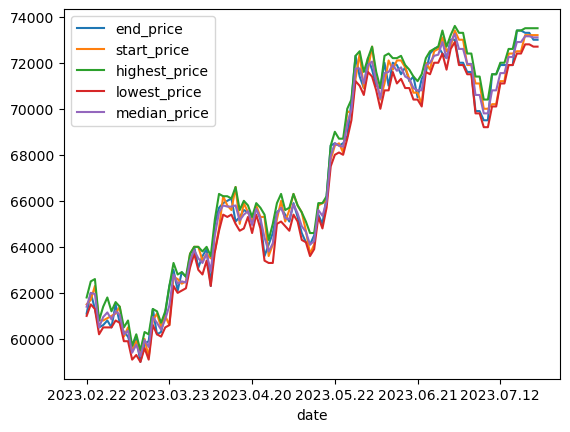

In [22]:
# 전체 숫자 데이터 선 그래프 그리기
all_tables.plot.line()

<AxesSubplot:xlabel='date'>

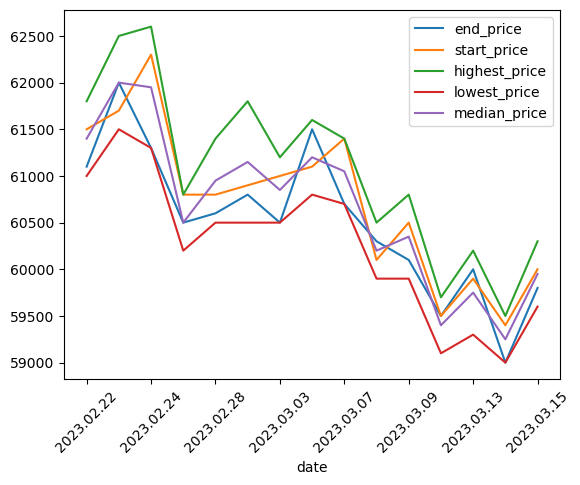

In [23]:
# 앞 15일치 데이터 선 그래프 그리기
all_tables[:15].plot.line(rot=45)

<AxesSubplot:xlabel='date'>

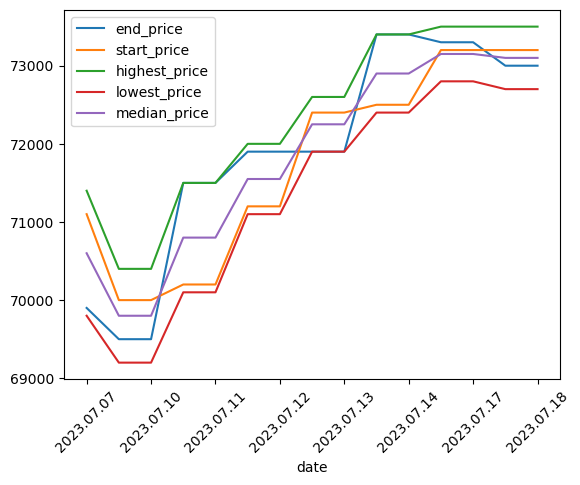

In [25]:
# 앞 15일치 데이터 선 그래프 그리기
all_tables[-15:].plot.line(rot=45)

6. 상자 수염 그래프 그리기

<AxesSubplot:title={'center':'median_price'}, xlabel='[month]'>

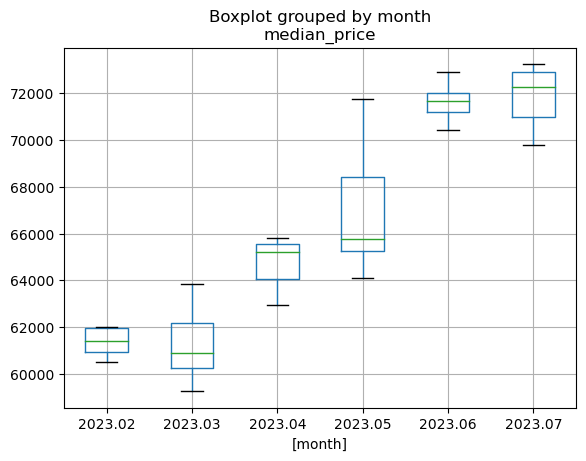

In [26]:
# 일일 주가 중앙값 상자 수염 글프 그리기
all_tables.boxplot(column=['median_price'], by=['month'])

- 전반적인 시세는, 지난 100일간 고가(최댓값)은 73,000, 저가(최솟값)은 58,000근처임
- 4월과 5월에는 크게 상승하고 있음

### 과제 1
- 본인이 관심있는 히사의 종목을 선택하여 분석해 보자
- 최근 100일 분량의 데이터를 확보하고, 월 단위 중앙 값을 기준으로 상자수염 그래프를 그린 후 결과를 분석해 본다,


### 과제 2
- 과제 1의 결과의 범위를 1년으로 늘려 보자
- 과제 1과 비교하여 결과를 분석해 본다